<a href="https://colab.research.google.com/github/aliss153/Aprendizaje-Automatico/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 17 Enero 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [37]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

- Muestra algunos datos.

In [2]:
url_data = "https://raw.githubusercontent.com/aliss153/Aprendizaje-Automatico/main/Country-data.csv"
df = pd.read_csv(url_data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- Muestra una descripción de los datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000



- Escalar los datos si es necesario.

In [6]:
numeric_cols = df.drop(columns=['country']).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

la variable objetivo será 'income', para poder clasificar países según el nivel de ingreso

In [32]:
df['income_class'] = pd.qcut(
    df['income'],
    q=3,
    labels=[0, 1, 2])
df['income_class'].value_counts()


,count
income_class,
0,56
2,56
1,55


In [33]:
X = df_scaled.drop(columns=['income'])
y = df['income_class']

Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [34]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

Entrenamos el modelo:

In [35]:
# Crear y entrenar un arbol con ganancia de información
modelo = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Evaluación del modelo

In [36]:
y_pred = modelo.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.91
Matriz de confusión:
[[12  0  0]
 [ 0 11  0]
 [ 0  3  8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.79      1.00      0.88        11
           2       1.00      0.73      0.84        11

    accuracy                           0.91        34
   macro avg       0.93      0.91      0.91        34
weighted avg       0.93      0.91      0.91        34



El modelo obtuvo una precisión del 91% sobre el conjunto de datos, lo que  mostraun buen desempeño general y un balance adecuado entre las clases.

- con la visualización

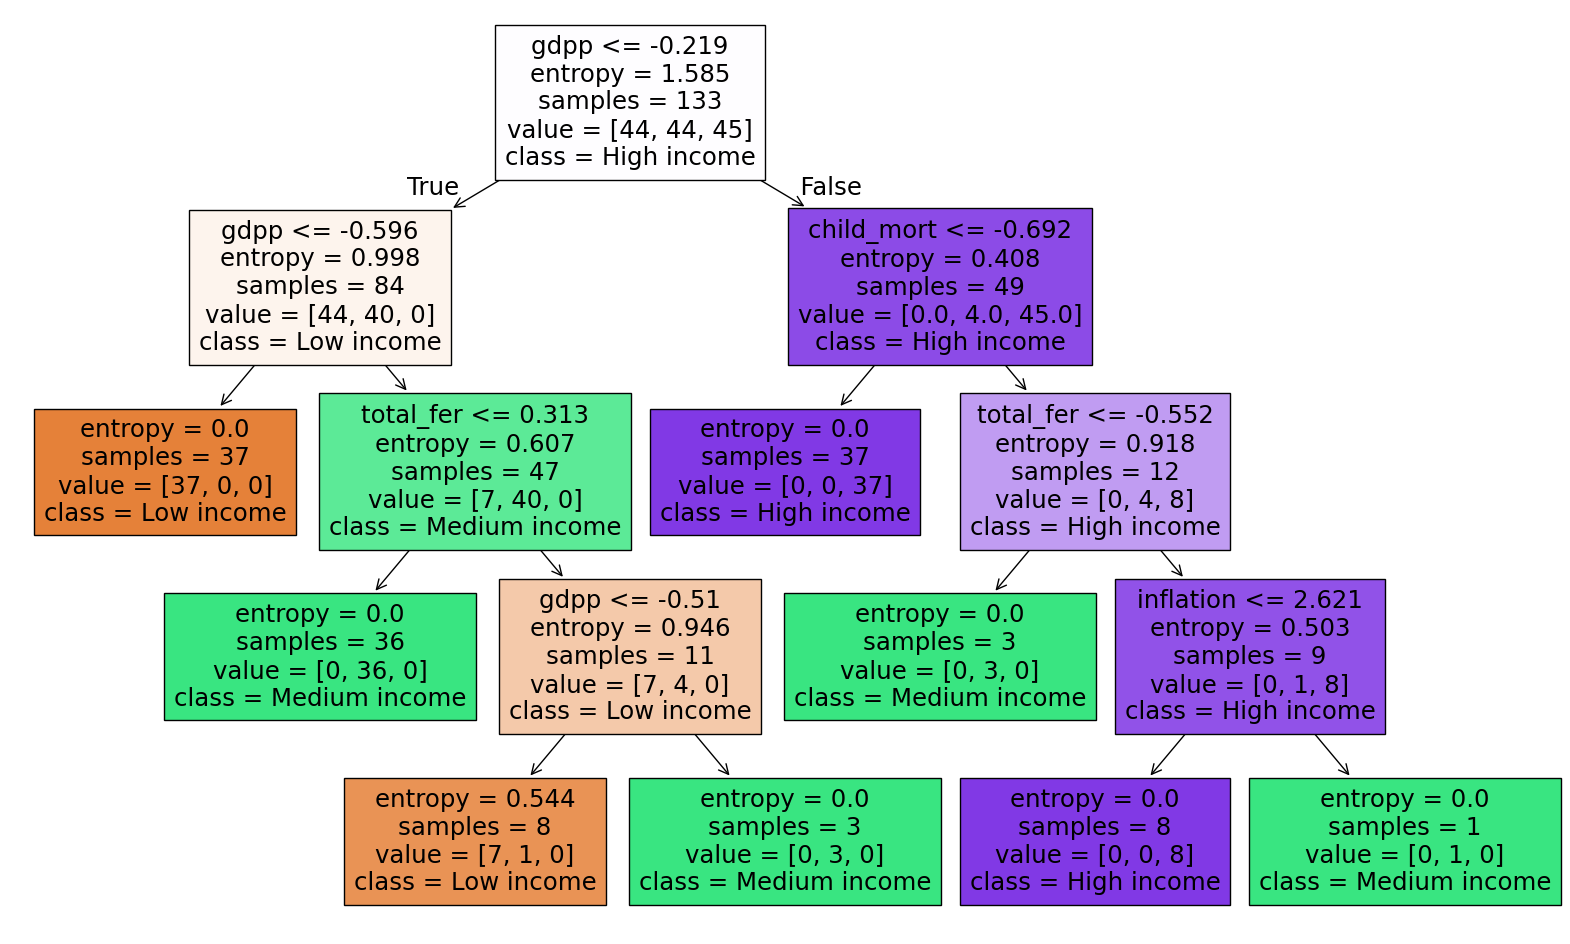

In [38]:
plt.figure(figsize=(20, 12))
plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=['Low income', 'Medium income', 'High income'],
    filled=True
)
plt.show()

Aqui podemos identificar al PIB per cápita como la variable más relevante para la clasificación del nivel de ingreso de los países. Además, la estructura del árbol muestra nodos con baja entropía, indicando una buena separación entre clases.